## NOTES
 - ive done simple encoding 0 = Adult, 1 = Senior, if value is between then too it will be classified as an adult
 - ive implemented knn so far, but iterative imputation MICE, might be better
 - ive removed RIAGENDR column, as age is not dependant on a man or a woman
 - i need to research glucose level, and tolerance see if any thing can be done for that, also insulin and diabetes are also similar fields, maybe i can reduce both these pairs down to reduce curse of dimensionality
 - RandomForestClassification was used first, ill try Linear and Logistic Regression
 - Feature Scaling was done, different methods can also be used???
 - XGBoost, GridSearchCV are options to explore
 - explore data more


# Setup


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')
sample = pd.read_csv('Sample_Submission.csv')

In [ ]:
train.drop('RIAGENDR', axis=1, inplace=True)
test.drop('RIAGENDR', axis=1, inplace=True)

In [ ]:
train.head()

,SEQN,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [ ]:
test[test.SEQN.isnull()]

,SEQN,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
43,NaN,2.0,21.7,92.0,2.0,74.0,6.83
304,NaN,2.0,27.9,104.0,2.0,73.0,12.55


In [ ]:
sample.head()

,age_group
0,0
1,0
2,0
3,0
4,0


In [ ]:
sample.value_counts()

,count
age_group,
0,262
1,50


# EDA

In [ ]:
train.where(train['age_group'] == 'Senior').dropna()

,SEQN,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
8,73607.0,2.0,38.9,89.0,2.0,113.0,17.47,Senior
12,73621.0,2.0,24.6,100.0,2.0,97.0,4.33,Senior
14,73639.0,2.0,30.3,133.0,2.0,295.0,22.92,Senior
15,73640.0,1.0,22.1,114.0,2.0,150.0,10.09,Senior
25,73690.0,2.0,21.4,90.0,2.0,76.0,3.47,Senior
...,...,...,...,...,...,...,...,...
1941,83615.0,2.0,24.9,105.0,2.0,100.0,9.50,Senior
1946,83630.0,2.0,26.0,106.0,2.0,166.0,13.32,Senior
1949,83638.0,2.0,24.2,116.0,2.0,157.0,13.81,Senior
1957,83692.0,2.0,19.1,89.0,2.0,136.0,1.56,Senior


In [ ]:
numeric_cols = train.select_dtypes(include=np.number).columns

In [ ]:
list(train.columns)[:8]

['SEQN',
 'PAQ605',
 'BMXBMI',
 'LBXGLU',
 'DIQ010',
 'LBXGLT',
 'LBXIN',
 'age_group']

# Encoding
ok

In [ ]:
train['age_group'] = train['age_group'].map({'Adult': 0, 'Senior': 1})

In [ ]:
train.shape

(1966, 8)

In [ ]:
train[train.age_group.isnull()]

,SEQN,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
208,74670.0,2.0,27.3,118.0,3.0,154.0,14.44,NaN
360,75492.0,2.0,29.3,109.0,2.0,90.0,9.03,NaN
381,75621.0,2.0,26.9,99.0,2.0,180.0,25.45,NaN
562,76539.0,2.0,19.5,86.0,2.0,108.0,3.78,NaN
684,77144.0,1.0,22.2,100.0,2.0,92.0,9.63,NaN
690,77178.0,2.0,28.1,166.0,2.0,320.0,8.48,NaN
811,77748.0,2.0,23.9,91.0,2.0,101.0,4.76,NaN
895,78199.0,2.0,32.5,104.0,2.0,79.0,9.65,NaN
1049,79060.0,2.0,26.7,80.0,2.0,80.0,9.81,NaN
1244,80146.0,1.0,28.2,92.0,2.0,74.0,6.29,NaN


# Imputation
THINK MARK THINK, can be better maybe

<Axes: >

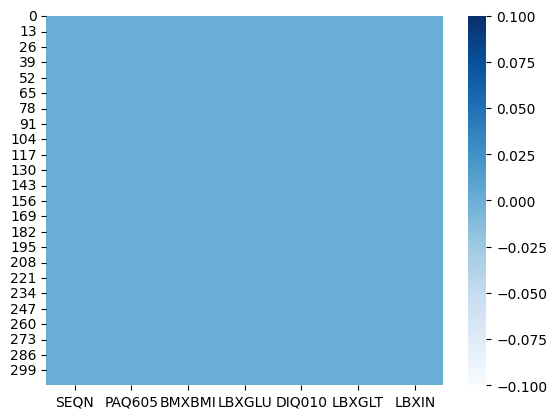

In [ ]:
sns.heatmap(test.isnull(), cmap='Blues')

<Axes: >

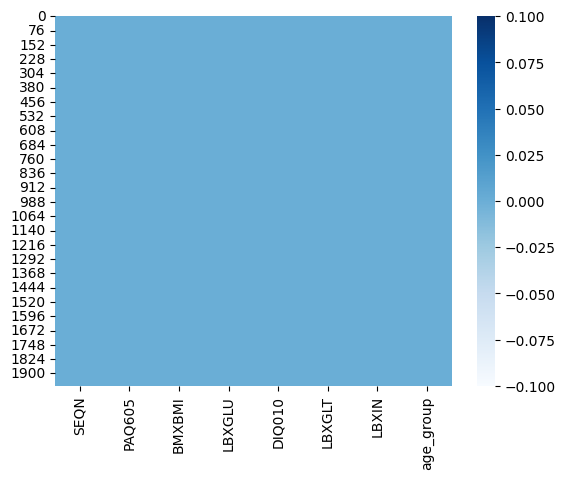

In [ ]:
sns.heatmap(train.isnull(), cmap='Blues')

In [ ]:
numeric_cols = train.select_dtypes(include=np.number).columns
numeric_cols

Index(['SEQN', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN',
       'age_group'],
      dtype='object')

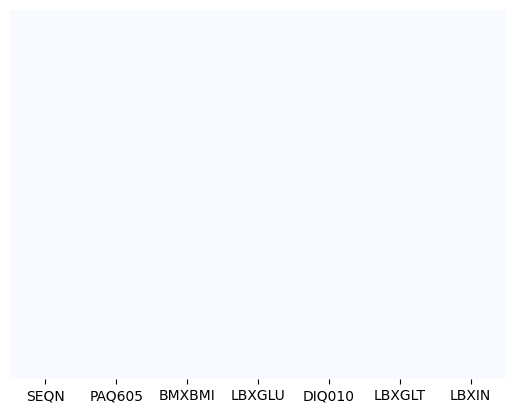

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_iterative_imputer = train.copy()
itr_imputer = IterativeImputer()
df_iterative_imputer[numeric_cols] = itr_imputer.fit_transform(df_iterative_imputer[numeric_cols])
sns.heatmap(df_iterative_imputer.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=train.columns);
train = df_iterative_imputer.copy()

df_iterative_imputer2 = test.copy()
itr_imputer2 = IterativeImputer()
df_iterative_imputer2[numeric_cols[:7]] = itr_imputer2.fit_transform(df_iterative_imputer2[numeric_cols[:7]])
sns.heatmap(df_iterative_imputer2.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=test.columns);
test= df_iterative_imputer2.copy()

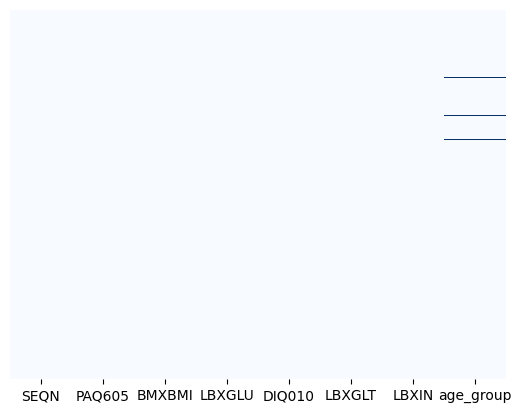

In [ ]:
'''
from sklearn.impute import KNNImputer

knn = train.copy()
knn_imputer = KNNImputer(n_neighbors=5)
knn[numeric_cols] = knn_imputer.fit_transform(knn[numeric_cols])
sns.heatmap(knn.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=knn.columns);
train = knn.copy()

knn2 = test.copy()
knn_imputer2 = KNNImputer(n_neighbors=5)
knn2[numeric_cols[:7]] = knn_imputer2.fit_transform(knn2[numeric_cols[:7]])
test = knn2.copy()
'''

In [ ]:
train[train.age_group.isnull()]

,SEQN,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group


In [ ]:
train['age_group'] = train['age_group'].apply(lambda x: 1.0 if x >= 0.5 else 0.0)


In [ ]:
train.age_group.unique()

array([0., 1.])

# Feature Scaling
try diff scaling methods

In [ ]:
df = train.copy()
x = df.drop('age_group', axis=1)
y = df['age_group']

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)       # x = your feature matrix
fin_test = sc.transform(test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [ ]:
y_train

,age_group
229,0.0
758,1.0
1437,0.0
978,1.0
1857,0.0
...,...
1568,0.0
1916,0.0
1667,0.0
414,0.0


# ML MODELS
many diff models possible

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc

model = rfc(random_state=91) #91
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
'''
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
'''

In [ ]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [ ]:
'''
from xgboost import XGBClassifier

sgdc = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
sgdc.fit(x_train, y_train)

y_pred = sgdc.predict(x_test)
'''

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
x_test

array([[-0.9345292 ,  0.43875047, -0.87264045, ..., -0.08506923,
         0.23581146, -1.11352067],
       [-1.59091783,  0.43875047,  0.04983261, ..., -0.08506923,
        -0.26245798, -0.07904453],
       [ 0.26639094,  0.43875047, -0.40739572, ..., -0.08506923,
        -0.26245798, -0.63172394],
       ...,
       [-1.06800289,  0.43875047, -0.13372236, ..., -0.08506923,
        -0.65240798, -0.37284808],
       [ 1.27310513,  0.43875047, -0.36634472, ..., -0.08506923,
        -0.54408853, -0.72315232],
       [ 1.57779572,  0.43875047, -0.02425301, ..., -0.08506923,
        -0.37077742,  0.98214102]])

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8781725888324873


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       345
         1.0       0.53      0.18      0.27        49

    accuracy                           0.88       394
   macro avg       0.71      0.58      0.60       394
weighted avg       0.85      0.88      0.85       394



# final steps to submission

In [ ]:
fin_test

array([[-0.58773361, -2.02758529,  0.6568986 , ..., -0.12144423,
         0.39928274,  0.36050919],
       [-1.08461967,  0.49486046, -0.22395444, ..., -0.12144423,
         0.51443013,  0.37623244],
       [-1.69319272,  0.49486046,  0.11942895, ..., -0.12144423,
         0.41847397, -0.29881911],
       ...,
       [-0.30488546,  0.49486046,  2.04536186, ..., -0.12144423,
         0.66795998,  0.40348607],
       [ 0.19511262,  0.49486046, -0.79128352, ..., -0.12144423,
        -0.40674898, -1.0776441 ],
       [-0.51961492,  0.49486046, -1.74678512, ..., -0.12144423,
         1.58913908, -0.32502452]])

In [ ]:
s = model.predict(fin_test)

In [ ]:
data = {'age_group' : s}
result = pd.DataFrame(data)

In [ ]:
# 17 submitted
result.to_csv('s18.csv', index=False)